In [2]:
# Build a predictive linear regression model for given dataset, given temperature,
# humidity, wind speed , wind bearing, visibility, pressure predict apparent temperature

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('weatherHistory.csv')
dataset = data[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)','Apparent Temperature (C)']]
dataset

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13,7.388889
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,7.227778
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,9.377778
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41,5.944444
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51,6.977778
...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,1014.36,26.016667
96449,24.583333,0.48,10.0947,20.0,15.5526,1015.16,24.583333
96450,22.038889,0.56,8.9838,30.0,16.1000,1015.66,22.038889
96451,21.522222,0.60,10.5294,20.0,16.1000,1015.95,21.522222


In [39]:
x1= (dataset.iloc[:,0] - dataset.iloc[:,0].mean())/dataset.iloc[:,0].std()
x2= (dataset.iloc[:,1] - dataset.iloc[:,1].mean())/dataset.iloc[:,1].std()
x3= (dataset.iloc[:,2] - dataset.iloc[:,2].mean())/dataset.iloc[:,2].std()
x4= (dataset.iloc[:,3] - dataset.iloc[:,3].mean())/dataset.iloc[:,3].std()
x5= (dataset.iloc[:,4] - dataset.iloc[:,4].mean())/dataset.iloc[:,4].std()
x6= (dataset.iloc[:,5] - dataset.iloc[:,5].mean())/dataset.iloc[:,5].std()

In [42]:
X=pd.concat([x1, x2,x3,x4,x5,x6], axis=1)
X=np.array(X)
X


array([[-0.25759768,  0.79346631,  0.47863251,  0.59125294,  1.306969  ,
         0.10168465],
       [-0.26981211,  0.63999223,  0.49959129,  0.66575233,  1.306969  ,
         0.10595926],
       [-0.26748555,  0.79346631, -0.99546821,  0.15356902,  1.09958006,
         0.10860951],
       ...,
       [ 1.05807061, -0.89474863, -0.26423973, -1.46679273,  1.37225812,
         0.10621573],
       [ 1.00397815, -0.69011652, -0.04067943, -1.55991697,  1.37225812,
         0.108695  ],
       [ 0.89055847, -0.63895849, -0.71368908, -1.38298092,  1.23399882,
         0.11049034]])

In [46]:
Y = dataset.iloc[:,-1].values

In [47]:
train_index = int(0.6 * len(X))
X_train, X_test = X[:train_index], X[train_index:]
Y_train, Y_test = Y[:train_index], Y[train_index:]

In [48]:
print(X_train.shape,X_test.shape)

(57871, 6) (38582, 6)


In [49]:
print(Y_train.shape,Y_test.shape)

(57871,) (38582,)


In [50]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [55]:
w, b, c= GradientDescent(X_train, Y_train, np.zeros(X_train.shape[1]), 0, 0.001,epochs=20000)

Cost is: 117.75317450972486
Cost is: 4.327094111206947
Cost is: 1.2992565930474533
Cost is: 0.7948807274886333
Cost is: 0.6661157463612088
Cost is: 0.6319734159916532
Cost is: 0.622893082615299
Cost is: 0.6204772961020693
Cost is: 0.6198345437605082
Cost is: 0.6196635278855512


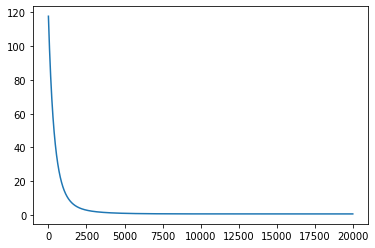

In [56]:
plt.plot(c)

In [57]:
def predict(X, w, b):
    return X.dot(w) + b
y_pred = predict(X_test, w, b)
y_pred

array([ 2.05333382,  2.57828602,  5.20006274, ..., 22.15231116,
       21.44662056, 20.73197885])

In [58]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    mss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / mss)
    return r2
r2score(y_pred, Y_test)

0.9893264963364536

In [59]:
def rmse(y_pred, y):
    rmse = (((y - y_pred)**2).mean())**(1/2)
    return rmse
rmse(y_pred, Y_test)

1.0285853872632884